<a href="https://colab.research.google.com/github/seifahmed2004/Song-recommendation-system-using-SVM-model/blob/main/SeifAhmedCodealphaT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [95]:
df=pd.read_csv("data.csv")
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


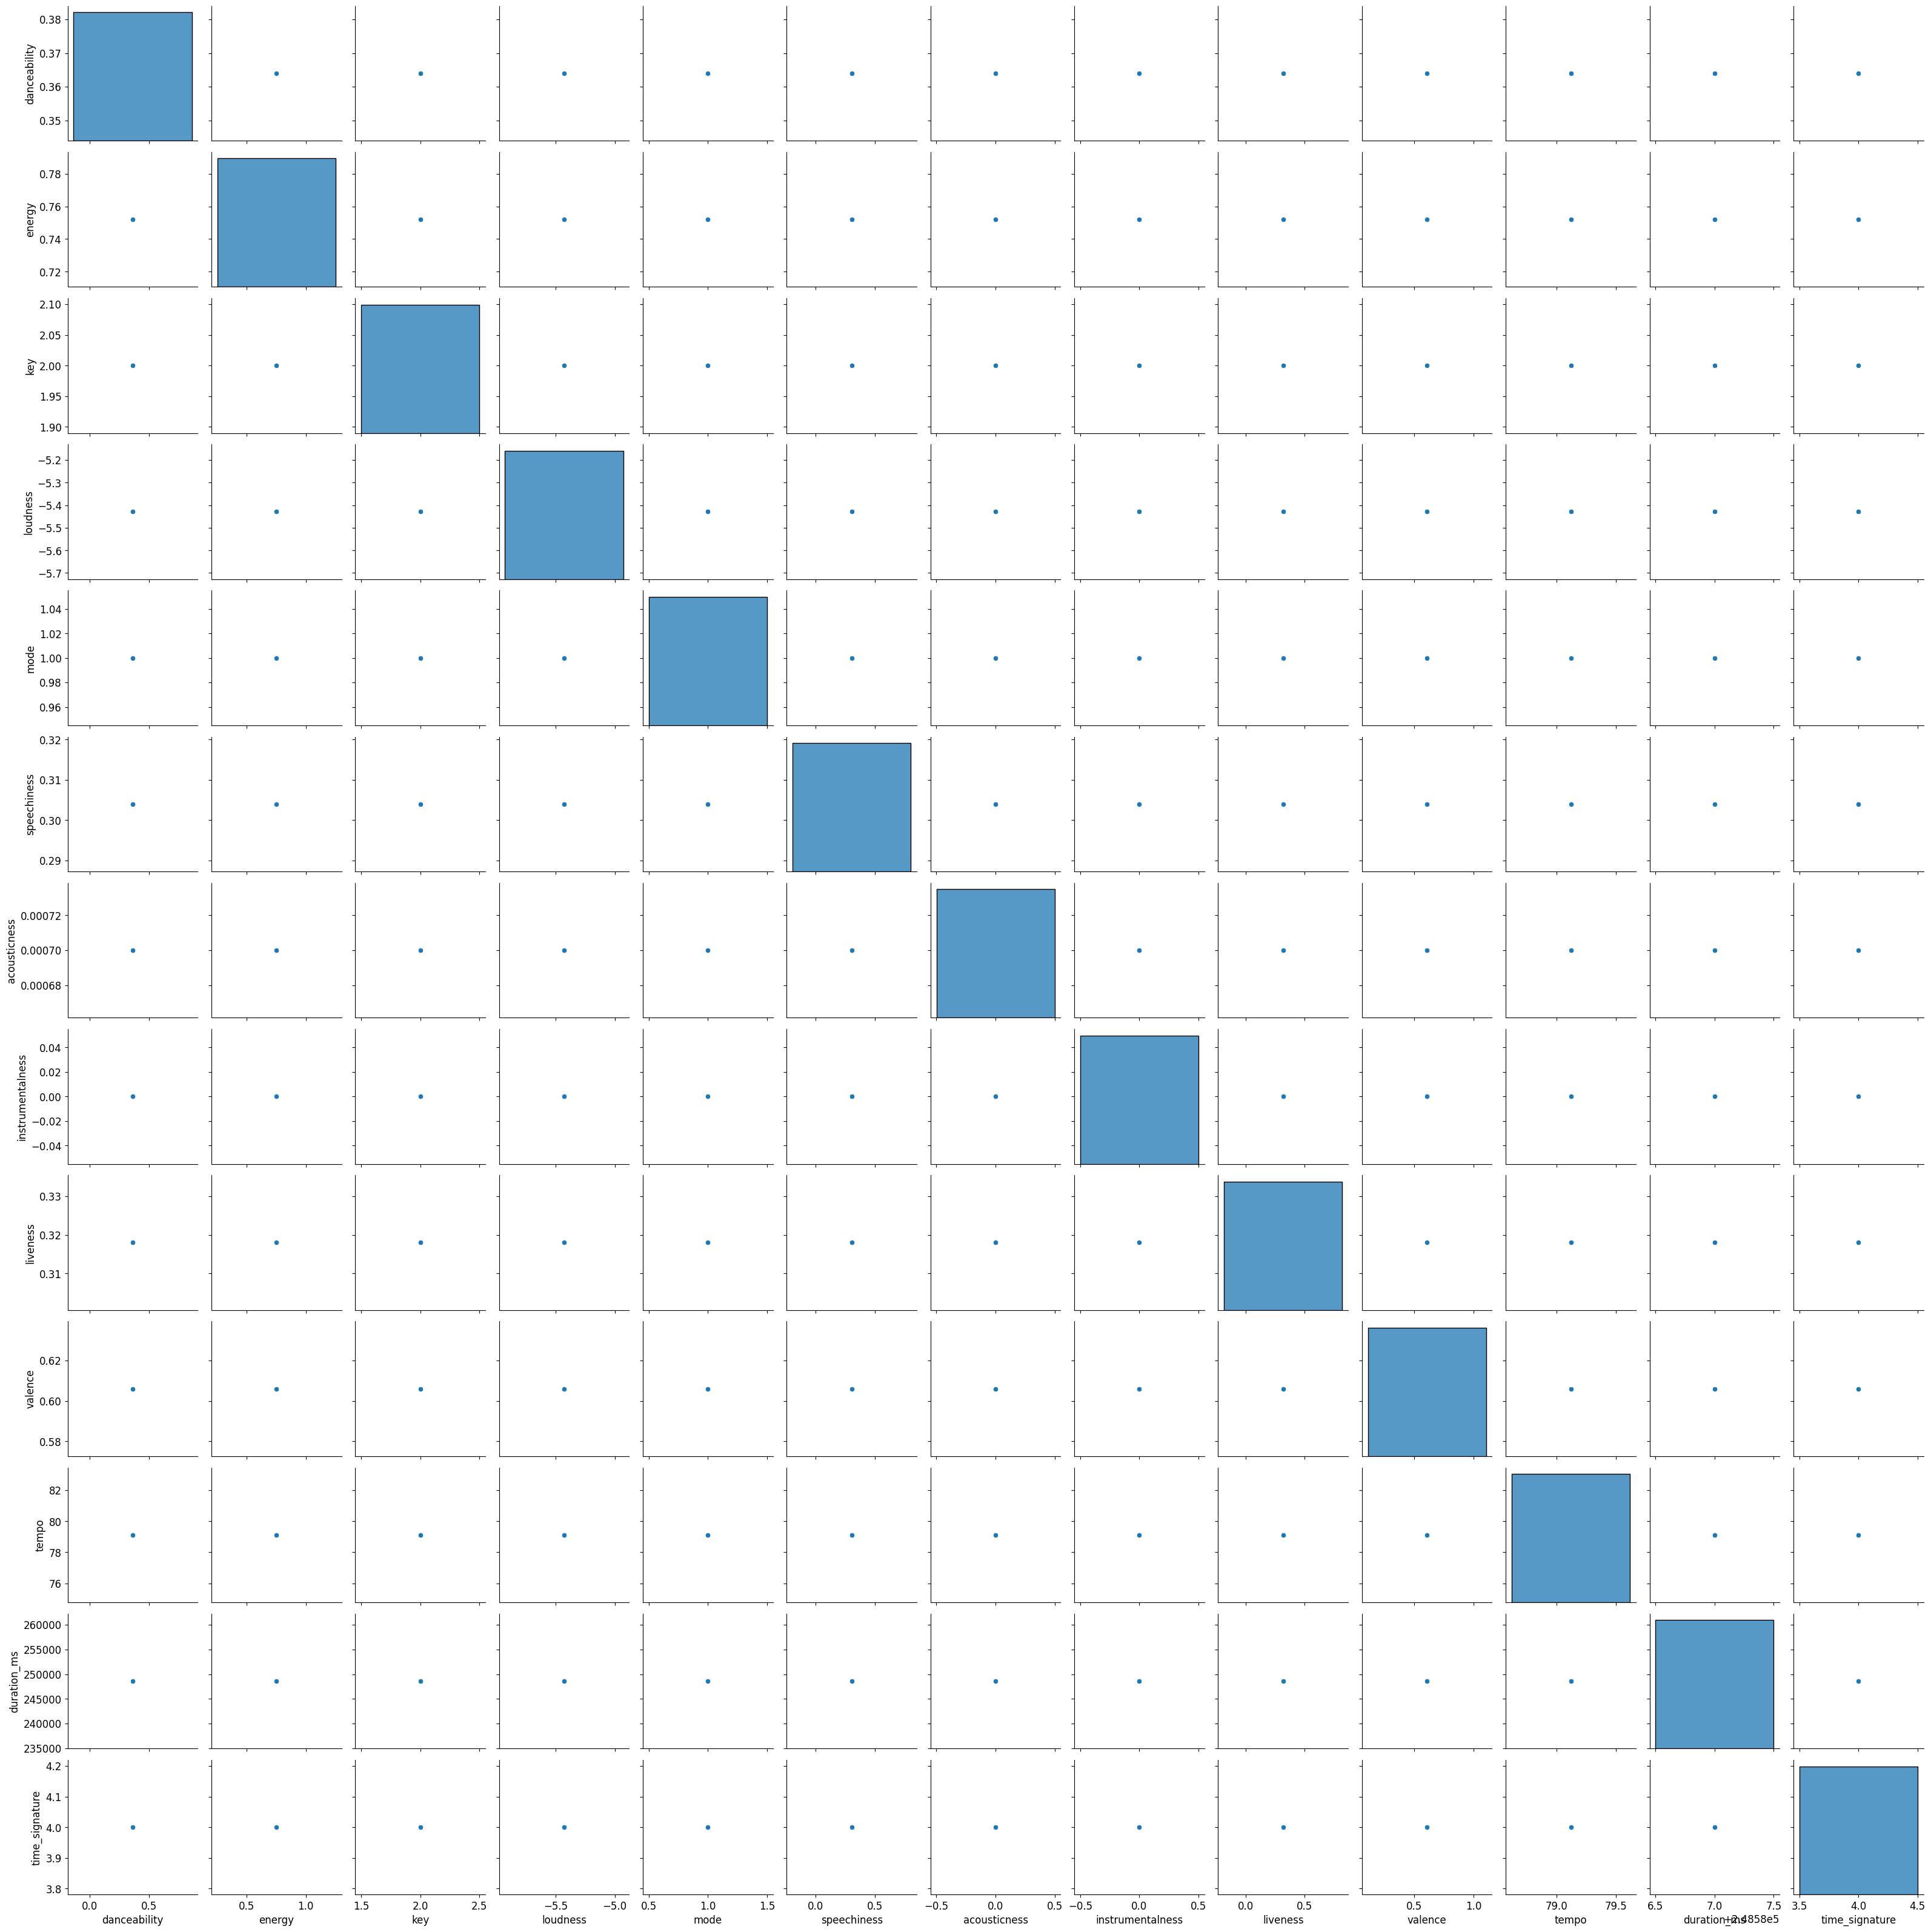

In [130]:
filtered_df = df.select_dtypes(include=['int', 'float'])
correlation_matrix = filtered_df.corr()
sns.pairplot(filtered_df)
plt.show()

In [96]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [98]:
df.dropna()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [99]:
df.drop_duplicates()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.4510,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.2060,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.9920,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.4310,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.1450,0.000000,0.0753,0.6470,155.117,179413,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.1430,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.8820,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.6160,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.4130,110.547,190239,5,1


In [100]:
print("Missing values:")
print(df.isnull().sum())
print("Duplicate rows:")
print(df.duplicated().sum())

Missing values:
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64
Duplicate rows:
0


In [101]:
features = df[["danceability","energy","key","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature"]]
X = np.asarray(features)
X

array([[8.03e-01, 6.24e-01, 7.00e+00, ..., 9.60e+01, 3.05e+05, 4.00e+00],
       [7.62e-01, 7.03e-01, 1.00e+01, ..., 1.51e+02, 2.47e+05, 4.00e+00],
       [2.61e-01, 1.49e-02, 1.00e+00, ..., 7.53e+01, 2.87e+05, 4.00e+00],
       ...,
       [4.99e-01, 3.51e-01, 9.00e+00, ..., 9.07e+01, 2.36e+05, 4.00e+00],
       [5.74e-01, 7.29e-01, 1.00e+01, ..., 1.11e+02, 1.90e+05, 5.00e+00],
       [7.47e-01, 6.66e-01, 1.10e+01, ..., 7.75e+01, 1.77e+05, 4.00e+00]])

In [102]:
y = np.asarray(df['liked'])
y

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [103]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (156, 12) (156,)
Test set: (39, 12) (39,)


In [104]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.01, 0.1, 1, 10],
    'svm__kernel': ['rbf', 'poly', 'sigmoid']
}

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Best SVM model
best_svm = grid_search.best_estimator_

Best parameters found: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


In [105]:
# Cross-validation scores for the best model
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}, Mean: {cv_scores.mean()}, STD: {cv_scores.std()}")

Cross-validation scores: [0.91 0.81 0.9  0.81 0.94], Mean: 0.8715725806451612, STD: 0.0543517875088854


In [106]:
# Final evaluation on the test set
best_svm.fit(X_train, y_train)
svm_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print(f"Test set accuracy: {accuracy}")

Test set accuracy: 0.9487179487179487


In [107]:
y_hat = best_svm.predict(X_test)

In [108]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9489214489214489

In [109]:
print("SVM accuracy: ",accuracy)

SVM accuracy:  0.9487179487179487


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.91      0.95        22

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



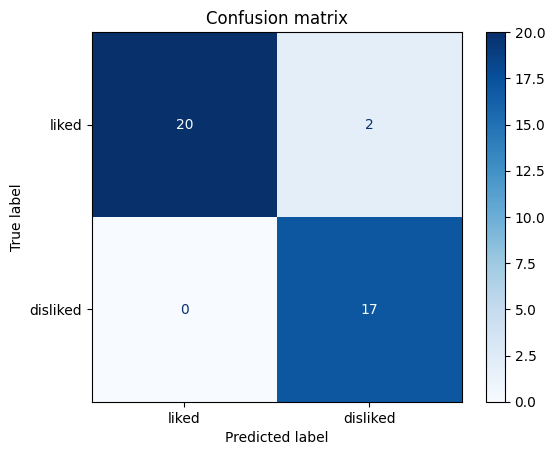

In [110]:
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1, 0])
np.set_printoptions(precision=2)

# Print the classification report
print(classification_report(y_test, y_hat))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['liked', 'disliked'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()


In [111]:
!pip install spotipy

In [112]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
client_id = '70dd0df189844dcfbc1ac8b11518084c'
client_secret = 'd3dae35ae76c483ab59be3f3b270a4fc'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
song_name = input("Enter the name of the song: ")
results = sp.search(q=song_name, type='track', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)[0]
print(audio_features)
df = pd.DataFrame([audio_features])
X = df[["danceability","energy","key","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature"]]
X = preprocessing.StandardScaler().fit_transform(X)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X)
if y_pred == 1:
  print("You will like this song.")
else:
  print("You will not like this song.")
#6 Foot 7 Foot

Enter the name of the song: 6 Foot 7 Foot
{'danceability': 0.364, 'energy': 0.752, 'key': 2, 'loudness': -5.429, 'mode': 1, 'speechiness': 0.304, 'acousticness': 0.0007, 'instrumentalness': 0, 'liveness': 0.318, 'valence': 0.606, 'tempo': 79.119, 'type': 'audio_features', 'id': '5Qy6a5KzM4XlRxsNcGYhgH', 'uri': 'spotify:track:5Qy6a5KzM4XlRxsNcGYhgH', 'track_href': 'https://api.spotify.com/v1/tracks/5Qy6a5KzM4XlRxsNcGYhgH', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5Qy6a5KzM4XlRxsNcGYhgH', 'duration_ms': 248587, 'time_signature': 4}
You will like this song.
